# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [2]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
pd.set_option('display.max_columns', None)

ds.head(3)


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,0,0,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,0,0,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [3]:
precio_maximo = ds['price'].max()
fila_maximo = ds[ds['price'] == precio_maximo]

direccion = fila_maximo['address'].iloc[0]


print(f'La casa ubicada en {direccion} es la mas cara con un precio de {precio_maximo}')



La casa ubicada en El Escorial es la mas cara con un precio de 8500000


#### Exercise 02. Which is cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [4]:
viviendas_regaladas= (ds['price']== 0).sum()
precio_filtrado = ds[ds['price']> 0]


precio_minimo = precio_filtrado['price'].min()
fila_minimo = precio_filtrado[precio_filtrado['price'] == precio_minimo]

direccion = fila_minimo['address'].iloc[0]


print(f'''Se han encontrado {viviendas_regaladas} propiedades por las que se piden 0 euros. 
 - Se han filtrado estas viviendas puesto que debe ser un error al introducir los datos.
 - Así, el resultado es que la propiedad ubicada en la calle {direccion} es la mas barata con un precio de {precio_minimo} euros''')


Se han encontrado 60 propiedades por las que se piden 0 euros. 
 - Se han filtrado estas viviendas puesto que debe ser un error al introducir los datos.
 - Así, el resultado es que la propiedad ubicada en la calle Berlin, Coslada es la mas barata con un precio de 600 euros


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [6]:

tamaño_maximo = ds['surface'].max()
fila_maximo = ds[ds['surface'] == tamaño_maximo]

direccion1 = fila_maximo['address'].iloc[0]
tamaño_minimo = ds['surface'].min()
fila_minimo = ds[ds['surface'] == tamaño_minimo]

direccion2 = fila_minimo['address'].iloc[0]

print(f'La propiedad ubicada en {direccion1} es la mas grande con una superficie de {int(tamaño_maximo)} metros cuadrados')
print(f'La propiedad ubicada en {direccion2} es la mas pequeña con una superficie de {int(tamaño_minimo)} metros cuadrados')

La propiedad ubicada en Sevilla la Nueva es la mas grande con una superficie de 249000 metros cuadrados
La propiedad ubicada en Calle Amparo,  Madrid Capital es la mas pequeña con una superficie de 15 metros cuadrados


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the name of the populations with comma as separator. For example:

`> print(populations)`

`population1, population2, population3,...`

In [7]:


poblaciones = list(ds['level5'].unique())
total = len(poblaciones)
poblaciones_sincomillas = ', '.join(poblaciones)
print(f'En la base de datos hay {total} poblaciones')
print(poblaciones_sincomillas)


En la base de datos hay 168 poblaciones
Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martí

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`true` or `fase`) followed by the rows/cols that contains NAs.

In [8]:
booleano = ds.isnull().values.any()
filas_nan = ds[ds.isna()]
print(booleano)
filas_nan

True


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions

In [9]:
columnas_na = ds.dropna(how='any')
dimension1 = ds.shape
dimension2 = columnas_na.shape
print(dimension1, dimension2)
columnas_na.isnull().values.any()



(15335, 37) (0, 37)


False

#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value

In [10]:
arroyomolino_ds = ds[ds['level5'] == "Arroyomolinos (Madrid)"]
media_precio = arroyomolino_ds['price'].mean()    
print(f'El precio medio de las propiedades en Arroyomolinos(Madrid) es de {round(media_precio)} euros')


    
   
    



El precio medio de las propiedades en Arroyomolinos(Madrid) es de 294542 euros


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

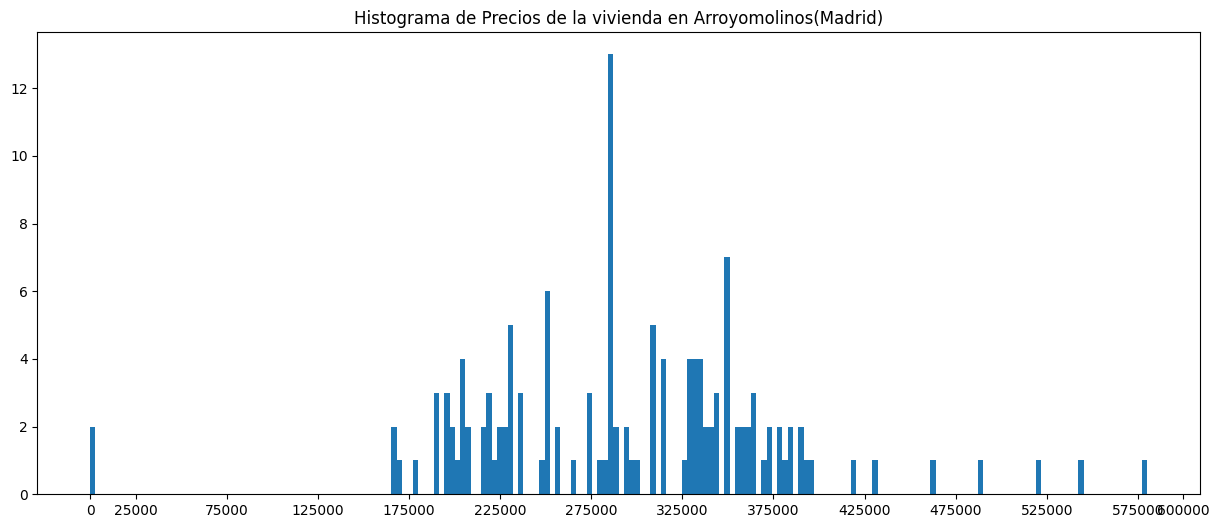

In [11]:
from matplotlib import pyplot as plt


plt.figure(figsize=(15, 6))
plt.hist(arroyomolino_ds['price'], bins=200)
plt.xticks([0, 25000, 75000, 125000, 175000, 225000, 275000, 325000, 375000, 425000, 475000, 525000, 575000, 600000])
plt.title('Histograma de Precios de la vivienda en Arroyomolinos(Madrid)')
plt.show()

Distribucion(137 viviendas):<br> 

    -Se observan valores atipicos en el rango bajo(Viviendas en venta por 0 euros) que muy probablemente se deban a errores en los datos introducidos.
    -La mayor cantidad de propiedades en venta se encuentra en el rango entre 150.000 y 400.000 euros.  
    -Dentro de ese rango, se observa que el precio mas frecuente esta entre 275.000 y 300.000 euros (mas de 12 viviendas)
    -El histograma tiene una distribucion asimetrica. Pueden encontrarse viviendas por encima de los 400.000 euros hasta casi los 600.000, pero ninguna por debajo de los 150.000 euros.
              


#### Exercise 09. Is the average of "Valdemorillo" and "Galapagar" prices the same? (★★☆)

Print the both average prices and then write a conclusion about them

In [14]:

#media precio valdemorillo#
Valdemorillo_ds = ds[ds['level5'] == "Valdemorillo"]
media_precio_Valdemorillo = Valdemorillo_ds['price'].mean()

#media precio galapagar#
Galapagar_ds = ds[ds['level5'] == "Galapagar"]
media_precio_Galapagar = Galapagar_ds['price'].mean()

#cantidad de datos en cada muestra#
propiedades_valdemorillo = len(Valdemorillo_ds) 
propiedades_galapagar = len(Galapagar_ds)



print(f'''- El precio medio de las propiedades en Galapagar es de {round(media_precio_Galapagar)} euros
  mientras que el precio medio de las propiedades en Valdemorillo es de {round(media_precio_Valdemorillo)} euros. ''')


- El precio medio de las propiedades en Galapagar es de 360063 euros
  mientras que el precio medio de las propiedades en Valdemorillo es de 363860 euros. 


En principio la media de precios de las propiedades es muy similar. Valdemorillo es solo un  1.1% mas caro en promedio.
- No obstante hay que tener en cuenta que el tamaño de las muestras es diferente con 58 propiedades en Valdemorillo
  frente a las 84 en galapagar, por lo que las conclusiones podrian variar con mas datos

#### Exercise 10. Is the average of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same? (★★☆)

Print the both average prices and then write a conclusion about

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [15]:
ds['PPS'] = ds['price']/ds['surface']
Valdemorillo_ds = ds[ds['level5'] == "Valdemorillo"]
#media PPS valdemorillo#
media_PPS_Valdemorillo = Valdemorillo_ds['PPS'].mean()

#media PPS galapagar#
media_PPS_Galapagar = Galapagar_ds['PPS'].mean()
print(f'''Promedio de precio por metro cuadrado:
- {media_PPS_Valdemorillo:.2f} euros/m² en Valdemorillo
- {media_PPS_Galapagar:.2f} euros/m² en Galapagar''')

Promedio de precio por metro cuadrado:
- 1317.95 euros/m² en Valdemorillo
- 1606.32 euros/m² en Galapagar


Podemos concluir que:
- En Valdemorillo es posible conseguir una propiedad mas grande que en Galapagar con la misma inversion.
(Inversores que pretendan alquilar por habitaciones o incluso dividir la vivienda en varios apartamentos, puede que encuentren
mas atractiva esta población)
- El precio medio en Valdemorillos (363860 euros) y el de Galapagar (360063 euros)
son muy similares. Eso implica que las propiedades de la muestra son, en promedio, mas grandes en Valdemorillos.

#### Exercise 11. Analyse the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot` and then write a conclusion about it

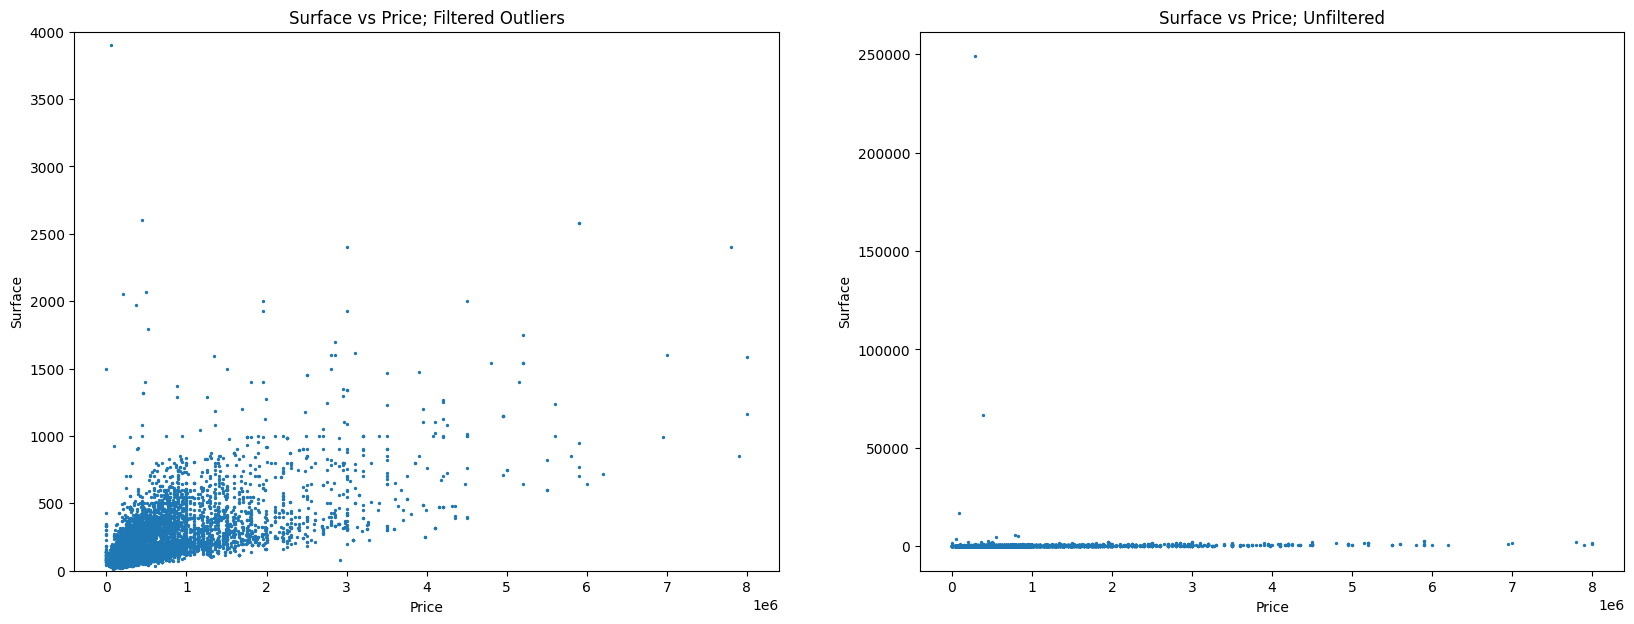

In [23]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

axs[0].scatter(ds['price'], ds['surface'], s=2)
axs[0].set_title('Surface vs Price; Filtered Outliers')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Surface')
axs[0].set_ylim ([0, 4000])

axs[1].scatter(ds['price'], ds['surface'], s=2)
axs[1].set_title('Surface vs Price; Unfiltered')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Surface')

plt.show()




Se han graficado dos versiones de los datos.
- En el primer gráfico se han filtrado los valores de superficie por encima de los 1000 M2. Se aprecia la mayor densidad de datos. Se puede intuir, de manera poco precisa, que la mayor parte de las propiedades estan por debajo de los 1000 m² y los 300.000 euros.
- El segundo gráfico muestra los datos en bruto y se puede observar que hay unas pocas propiedades que exceden por mucho los valores medios, llegando a tener una superficie de casi 250000 M² y precios en torno a 
8.000.000 de euros.

#### Exercise 12. How many real estate agencies the dataset contains? (★★☆)

Print the obtained value

In [24]:
inmobiliarias = list(ds['realEstate_name'].unique())
total = len(inmobiliarias)
print(f'En la base de datos hay {total} inmobiliarias')


En la base de datos hay 1822 inmobiliarias


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses

In [25]:

propiedades_contadas = ds['level5'].value_counts()
poblacion_maximo = propiedades_contadas.idxmax()
print(f'La poblacion con mas propiedades en venta es {poblacion_maximo} con {propiedades_contadas[poblacion_maximo]} propiedades')

La poblacion con mas propiedades en venta es  Madrid Capital con 6643 propiedades


#### Exercise 14. Now let's work with the "south belt" of madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`

In [26]:
valores_filtro = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']
filtro_poblaciones = ds['level5'].isin(valores_filtro)
ds_14 = ds[filtro_poblaciones]
ds_14.head(5)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,description,address,country,level1,level2,level3,level4,level5,level6,level7,level8,upperLevel,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone,PPS
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,0,0,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN,1034.883721
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,2019-12-28T18:30:53.960102Z,"¡oportunidad! vivienda de obra nueva, local ad...","Avenida Carabancheles, 18, Alcorcón",España,Madrid,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Centro,Casco Antiguo,Casco Antiguo,0,0,0,0,0,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN,2140.000000
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,2019-12-28T18:30:53.960102Z,VIVIENDAS365-VENDE- Hermosa Vivienda en el Bar...,"Avenida Los Pinos, Leganés",España,Madrid,Madrid,Zona Sur de Madrid,"Leganés, Zona de",Leganés,NaN,Valdepelayo - Montepinos - Arroyo Culebro,NaN,Valdepelayo - Montepinos - Arroyo Culebro,0,0,0,0,0,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN,2666.666667
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,2019-12-28T18:32:32.5337942Z,AREA UNO asesores inmobiliarios oficina de las...,Alcorcón,España,Madrid,Madrid,Zona Suroeste,"Alcorcón, Zona de",Alcorcón,NaN,Prado Santo Domingo - Ensanche,NaN,Prado Santo Domingo - Ensanche,0,0,0,0,0,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN,2992.957746


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot

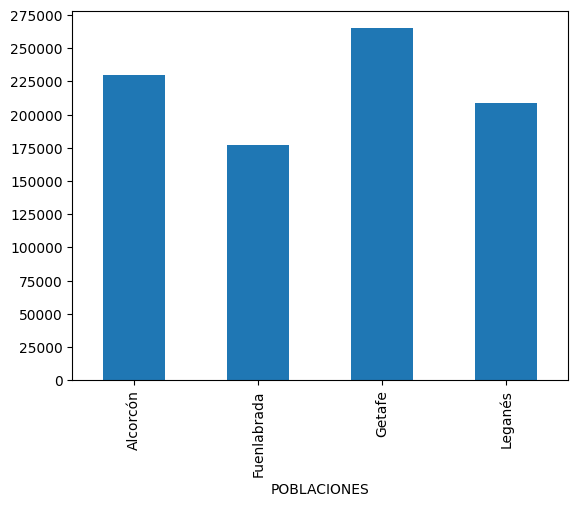

In [37]:
import numpy as np
import matplotlib as mp
mean_price = ds_14.groupby('level5') ['price'].mean()
plt.yticks(np.arange(0, mean_price.max() * 1.1, step=25000))
mean_price.plot(kind='bar', xlabel=('POBLACIONES'))
plt.show()

El precio medio Más bajo Lo tiene Fuenlabrada seguido de leganés, Alcorcón y por último Getafe, que es el que tiene el precio medio más alto(por encima de los 250000)

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14) (★★★)

Print both values for each variable

In [ ]:
#media de precio de las variables

media_precio = ds_14['price'].mean()
media_rooms = ds_14['rooms'].mean()
media_surface = ds_14['surface'].mean()
media_bathrooms = ds_14['bathrooms'].mean()

#varianza de las variables#

var_precio = ds_14['price'].var()
var_rooms = ds_14['rooms'].var()
var_surface = ds_14['surface'].var()
var_bathrooms = ds_14['bathrooms'].var()

print(f'''la media de precio es de {media_precio: .2f} y la varianza es {var_precio: .2f}
la media de habitaciones es de {media_rooms: .1f} y la varianza es {var_rooms: .1f}
la media de superficie es de {media_surface: .2f} y la varianza es {var_surface: .2f}
la media de baños es de {media_bathrooms: .1f} y la varianza es {var_bathrooms: .1f}''' )


la media de precio es de  223094.48 y la varianza es  14921367508.05
la media de habitaciones es de  3.0 y la varianza es  0.7
la media de superficie es de  111.75 y la varianza es  4263.05
la media de baños es de  1.6 y la varianza es  0.6


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [40]:
#agrupamos por población y hallamos el máximo#
id_casas_maximo = ds_14.groupby('level5')['price'].idxmax()

casas_maximo = ds_14.loc[id_casas_maximo]
for _, fila in casas_maximo.iterrows():
    poblacion = fila['level5']
    precio = fila['price']
    direccion = fila['address']
    print(f'población: {poblacion}, direccion: {direccion}, precio: {precio}' )


población: Alcorcón, direccion: Alcorcón, precio: 950000
población: Fuenlabrada, direccion: Calle de Paulo Freire, 5, Fuenlabrada, precio: 490000
población: Getafe, direccion: Getafe, precio: 1050000
población: Leganés, direccion: Avenida Reina Sofía, Leganés, precio: 650000


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

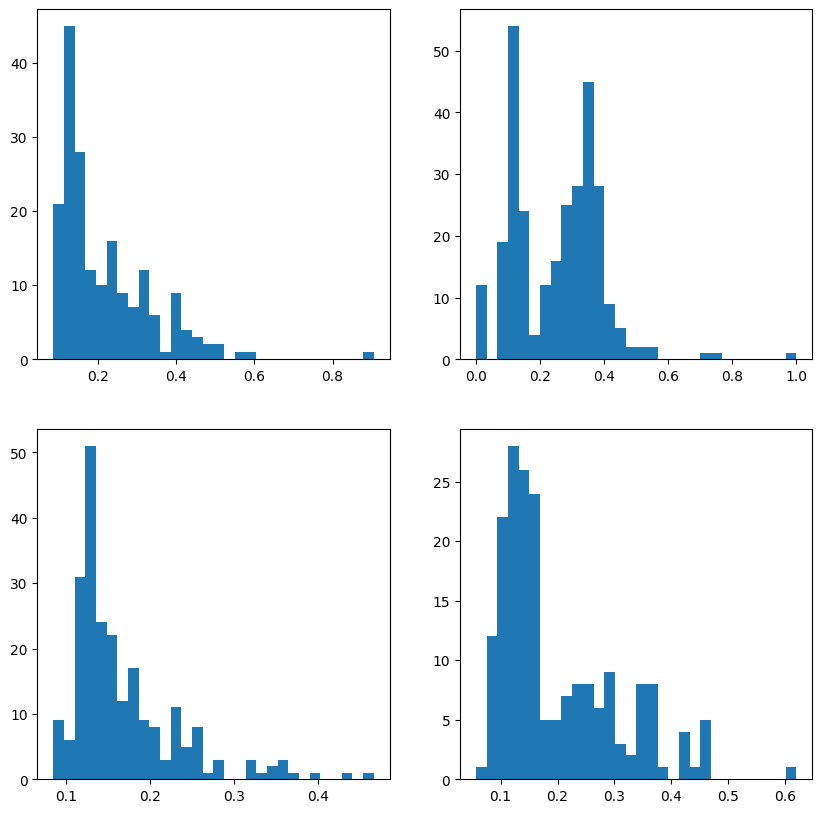

In [41]:
import matplotlib.pyplot as plt
import numpy as np

#funcion para normalizacion robusta de la variables price#
precio_minimo = ds_14['price'].min()
precio_maximo = ds_14['price'].max()

ds_14.loc[:,'normalizado'] = (ds['price'] - precio_minimo) / (precio_maximo - precio_minimo)
ds_alcorcon = ds_14[ds_14['level5'] == 'Alcorcón']
ds_getafe = ds_14[ds_14['level5'] == 'Getafe']
ds_Fuenlabrada = ds_14[ds_14['level5'] == 'Fuenlabrada']
ds_leganes = ds_14[ds_14['level5'] == 'Leganés']

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].hist(ds_alcorcon['normalizado'], bins=30)
axs[0, 1].hist(ds_getafe['normalizado'], bins=30)
axs[1, 0].hist(ds_Fuenlabrada['normalizado'], bins=30)
axs[1, 1].hist(ds_leganes['normalizado'], bins=30)

plt.show()





**TODO: Markdown**. To write here, double click to this cell and just remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [45]:
pps_media_alcorcon = ds_alcorcon['PPS'].mean()
pps_media_getafe = ds_getafe['PPS'].mean()

pps_std_alcorcon = ds_alcorcon['PPS'].std()
pps_std_getafe = ds_getafe['PPS'].std()

pps_var_alcorcon = ds_alcorcon['PPS'].var()
pps_var_getafe = ds_getafe['PPS'].var()

porcentaje_dif_pps = (pps_media_alcorcon - pps_media_getafe)
print(f'''el precio medio por metro cuadrado en Alcorcon es de {pps_media_alcorcon: .2f} euros y su desviacion estandar es {pps_std_alcorcon}
el precio medio por metro cuadrado en Getafe es de {pps_media_getafe: .2f} euros y su desviacion estandar es {pps_std_getafe}''')




el precio medio por metro cuadrado en Alcorcon es de  2239.30 euros y su desviacion estandar es 539.9515266064398
el precio medio por metro cuadrado en Getafe es de  2066.31 euros y su desviacion estandar es 741.8727021510158


El precio medio por metro cuadrado en Alcorcón es más alto pero la desviación estándar es menor que la de Getafe. el precio medio por metro cuadrado en Getafe es menor que el de Alcorcón pero su desviación estándar es mayor por lo que podemos concluir que si bien el precio medio por metro cuadrado de Alcorcón es más alto su dispersión es menor y los precios más estables en promedio.

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

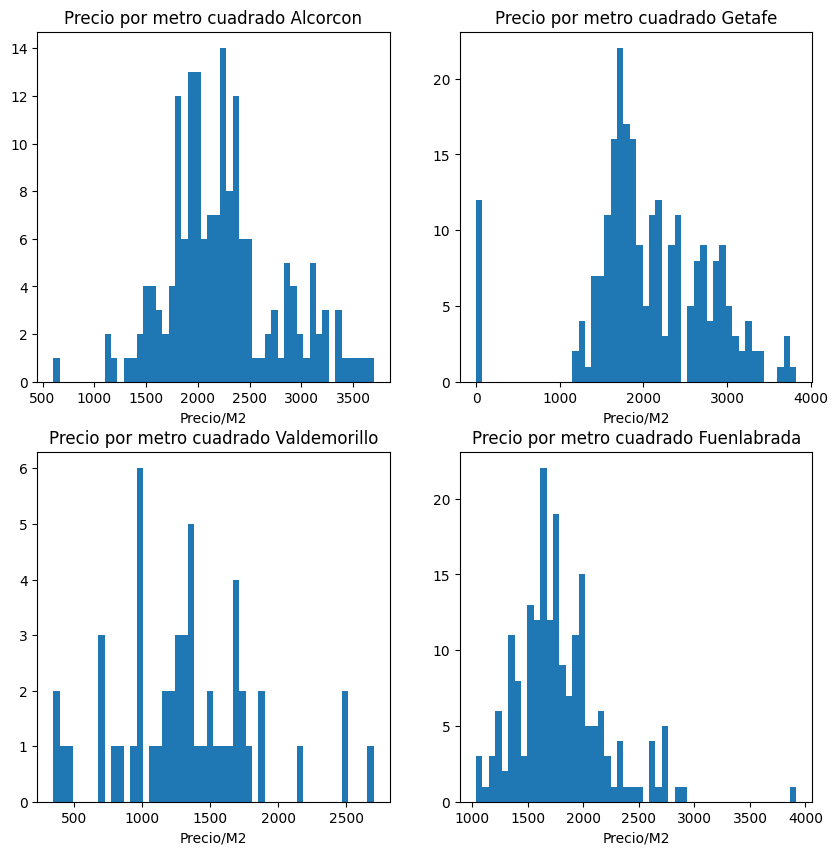

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].hist(ds_alcorcon['PPS'], bins=50)
axs[0, 0].set_title('Precio por metro cuadrado Alcorcon') 
axs[0, 0].set_xlabel('Precio/M2')

axs[0, 1].hist(ds_getafe['PPS'], bins=50)
axs[0, 1].set_title('Precio por metro cuadrado Getafe') 
axs[0, 1].set_xlabel('Precio/M2')
axs[1, 0].hist(Valdemorillo_ds['PPS'], bins=50)
axs[1, 0].set_title('Precio por metro cuadrado Valdemorillo') 
axs[1, 0].set_xlabel('Precio/M2')
axs[1, 1].hist(ds_Fuenlabrada['PPS'], bins=50)
axs[1, 1].set_title('Precio por metro cuadrado Fuenlabrada') 
axs[1, 1].set_xlabel('Precio/M2')
plt.show()


#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in the question 14) (★★★★)

Execute the following cell and then start coding in the next one. You must implement a simple code that transform the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [ ]:
from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

AttributeError: Stamen

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
